# Analysis of Variance: ANOVA
- Testing groups to see if there’s a difference between them
- One-Way or Two-Way Mean:
  - One-way has one independent variable 
    - Used to test two groups to see if there’s a difference between them 
    - Will tell if at least two groups are different from each other, but won’t tell what groups were different
  - Two-way has two independent variables
    - Without replication: Double-testing the same group: Before and After treatment
    - With replication: Two groups doing more than one thing (Two different Treatments)
- Groups or Levels:
  - Groups or levels are different groups in the same independent variable

In [7]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Using built-in datset morely
- 100 observations of 3 Varibales
- 5 experiments, each consisting of 20 consecutive 'runs' 
- The response is the speed of light measurement

In [2]:
head(morley, 25)

,Expt,Run,Speed
001,1,1,850
002,1,2,740
003,1,3,900
004,1,4,1070
005,1,5,930
006,1,6,850
007,1,7,950
008,1,8,980
009,1,9,980
010,1,10,880


## Use Boxplot to look at each of 5 experiments
- Conduct Analysis of Variance across each experiment

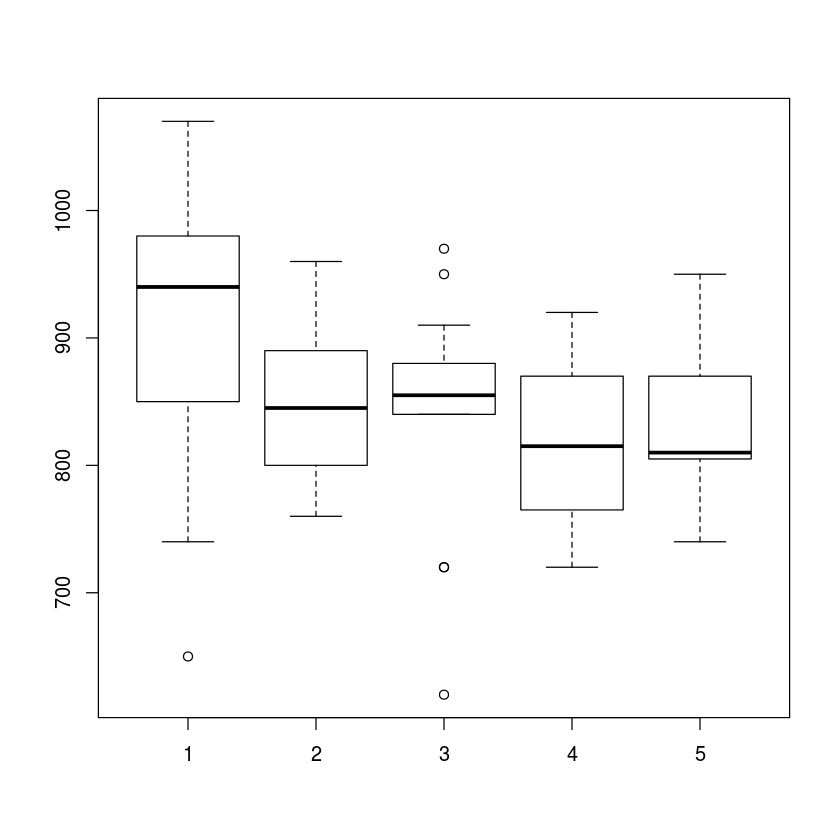

In [3]:
# Using Base R plotting
boxplot(Speed ~ Expt, data = morley)

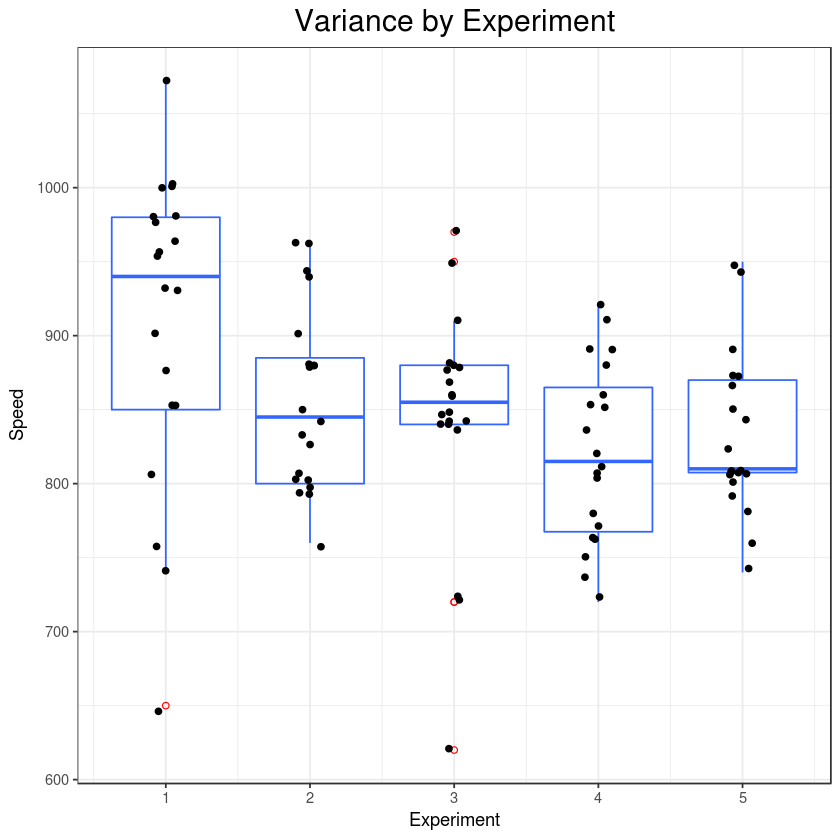

In [8]:
# Using ggplot2
morley %>%
  ggplot(aes(x = Expt, y = Speed, group = Expt)) +
  geom_boxplot(fill = "white", colour = "#3366FF", outlier.colour = "red", outlier.shape = 1) +
  geom_jitter(width = 0.1) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18)) +
  ggtitle("Variance by Experiment") +
  xlab("Experiment")

## Perform Analysis of Variance on the dataset
- anova of Speed and Experiment
- Pr(>F) = 0.000483
- The Mean from different experiments was not the same

In [9]:
a <- aov(Speed ~ Expt, data = morley)
summary(a)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Expt         1  72581   72581   13.04 0.000483 ***
Residuals   98 545444    5566                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Look at normal plot of residuals qqplot and normal line qqline
- Not a perfect fit

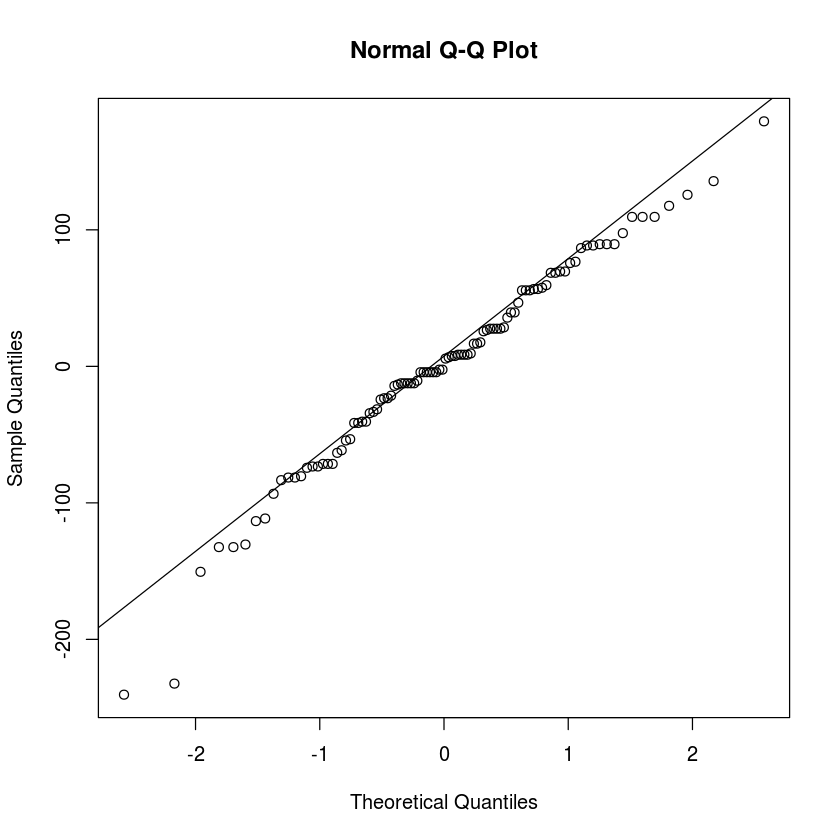

In [10]:
qqnorm(residuals(a))
qqline(residuals(a))

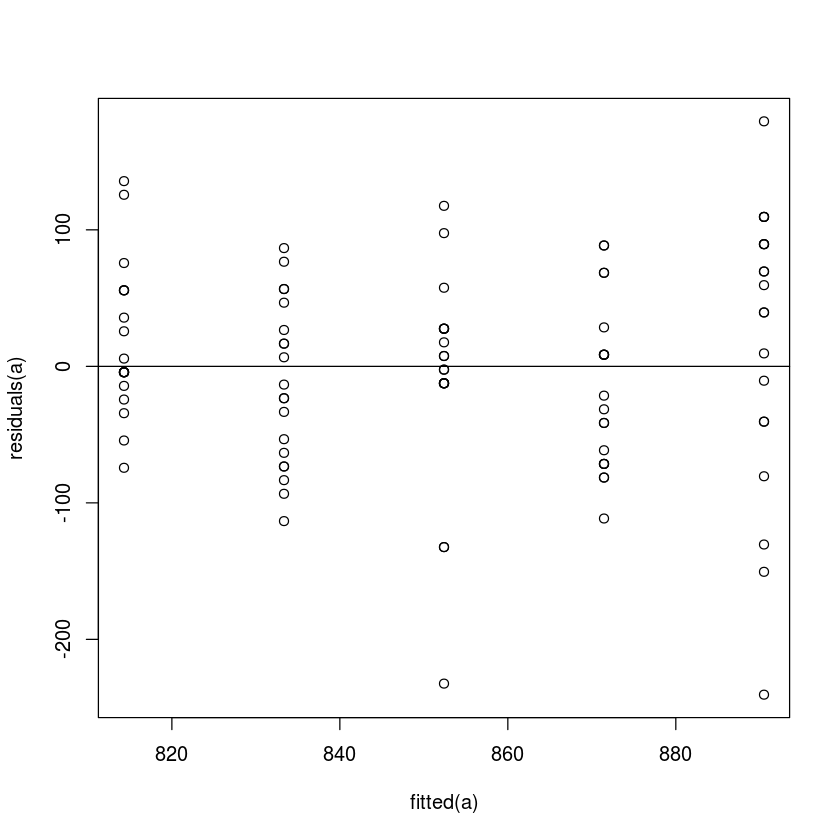

In [11]:
# Plot fitted values vs residuals
plot(fitted(a), residuals(a))
abline(h = 0)

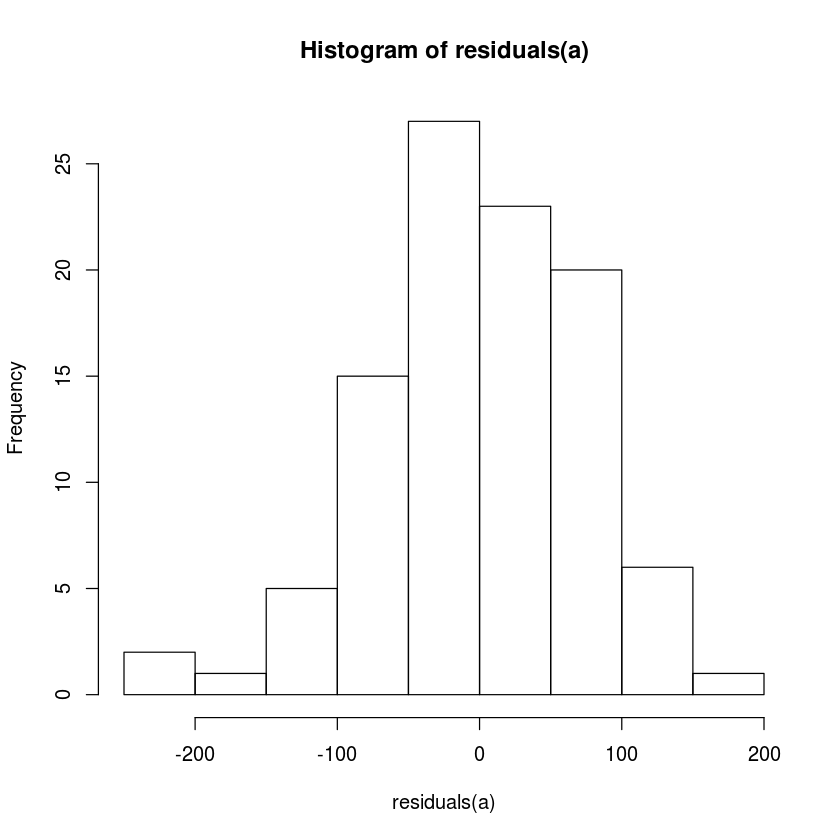

In [12]:
# Histogram of Residuals
hist(residuals(a))